# Choosing the best classifier for sign language dataset

In [1]:
import os
import pickle

import mediapipe as mp
import cv2

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dict = pickle.load(open('dataset_dictionary.pickle', 'rb'))

In [3]:
df = pd.DataFrame(data=data_dict['data'])
df['sign_number'] = data_dict['labels']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,sign_number
0,0.176237,0.265538,0.145103,0.164993,0.091986,0.094154,0.037782,0.047897,0.011824,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.176796,0.266859,0.145541,0.166711,0.092821,0.096287,0.037964,0.049173,0.012594,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.175248,0.268204,0.146128,0.169321,0.094887,0.097236,0.042042,0.049603,0.016205,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.177636,0.270464,0.149813,0.172520,0.096929,0.099372,0.042679,0.051389,0.016549,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.177636,0.270464,0.149813,0.172520,0.096929,0.099372,0.042679,0.051389,0.016549,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.095876,0.283107,0.087378,0.265017,0.079590,0.227725,0.077730,0.201398,0.075130,0.183350,...,0.093148,0.014391,0.092138,0.100123,0.102900,0.070972,0.109630,0.053175,0.114243,0.038622
std,0.069493,0.140358,0.062156,0.100735,0.054052,0.078515,0.054234,0.090441,0.068297,0.118278,...,0.021509,0.014336,0.047062,0.043424,0.035503,0.028677,0.025175,0.016983,0.016286,0.013055
min,0.000000,0.000000,0.000000,0.048601,0.000000,0.084305,0.001946,0.040985,0.000000,0.000000,...,0.070708,0.000000,0.036302,0.046255,0.056553,0.023930,0.072389,0.013589,0.085560,0.007016
25%,0.039721,0.233248,0.025992,0.181278,0.045840,0.172682,0.040998,0.150346,0.033863,0.128229,...,0.074168,0.004256,0.045851,0.063833,0.067542,0.050997,0.084965,0.047177,0.098666,0.035555
50%,0.095948,0.297004,0.089164,0.260086,0.065349,0.229658,0.066799,0.213458,0.062872,0.204884,...,0.095989,0.006915,0.083581,0.071685,0.100104,0.059794,0.112540,0.056371,0.123496,0.036393
75%,0.140348,0.378897,0.130458,0.336587,0.103819,0.280713,0.092574,0.262404,0.091507,0.259246,...,0.107993,0.022808,0.138775,0.139686,0.137299,0.094828,0.131960,0.063931,0.126210,0.045825
max,0.291711,0.562328,0.252582,0.518745,0.292311,0.420454,0.335255,0.495788,0.384387,0.585483,...,0.134077,0.040498,0.144671,0.153000,0.142799,0.106357,0.137975,0.071049,0.132149,0.056218


In [5]:
df.isna().sum()

0                 0
1                 0
2                 0
3                 0
4                 0
               ... 
80             1351
81             1351
82             1351
83             1351
sign_number       0
Length: 85, dtype: int64

In [6]:
df = df.drop(df.columns[42:-1], axis='columns')

In [7]:
df.isna().sum()

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
sign_number    0
dtype: int64

# The data we have

The data we have is coordinates which giving mediapipe based on my own photos of each sign


- **In the dataset there are such signs as:** *(starting from 0)*
    0. **Like**
    1. Like front
    2. Like inv
    3. **Dislike**
    4. Dislike front
    5. Dislike inv
    6. **Ok**
    7. Ok inv
    8. **Peace**
    9. Peace inv
    10. **Rock**
    11. Rock inv
    12. **YessPeace**
    13. YessPeace inv

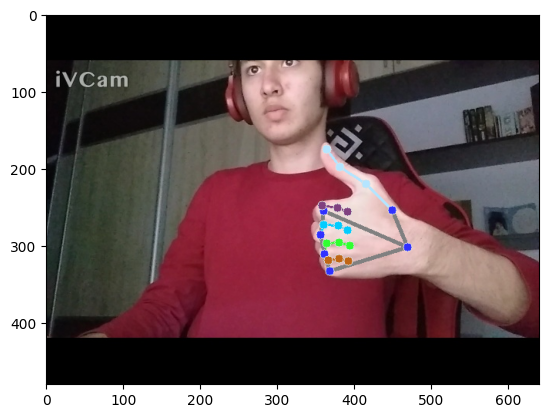

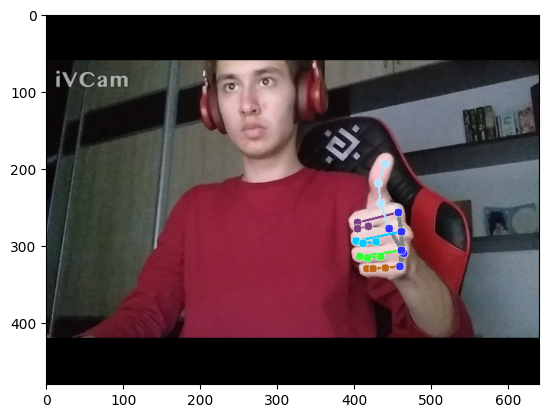

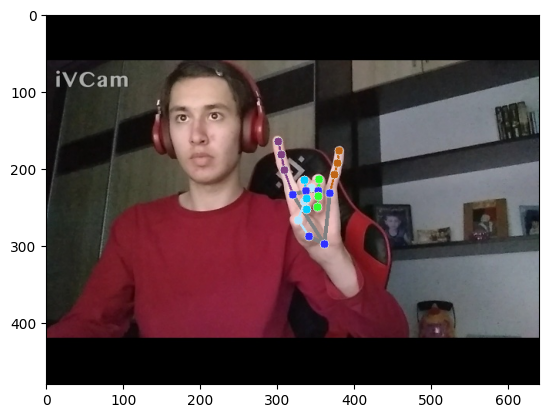

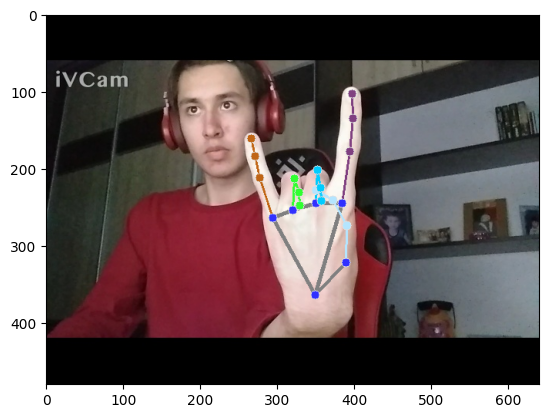

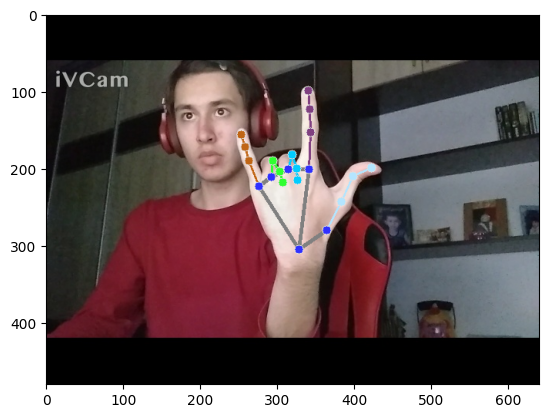

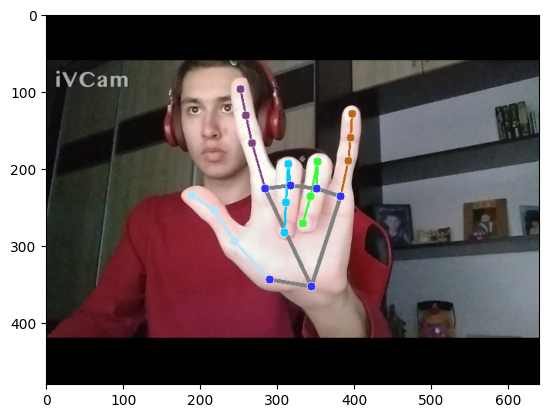

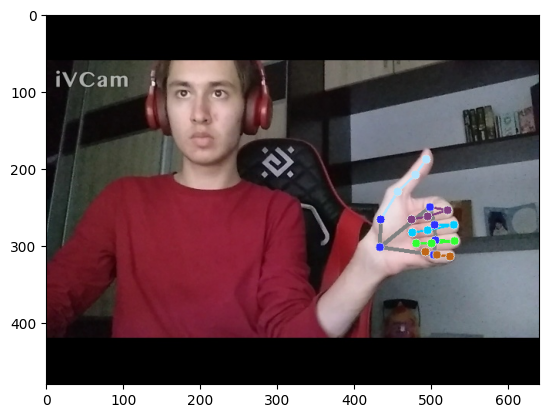

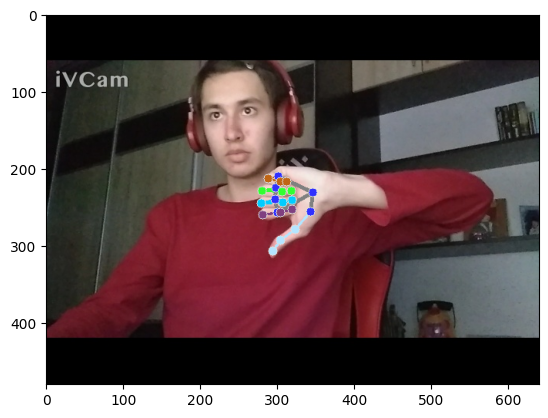

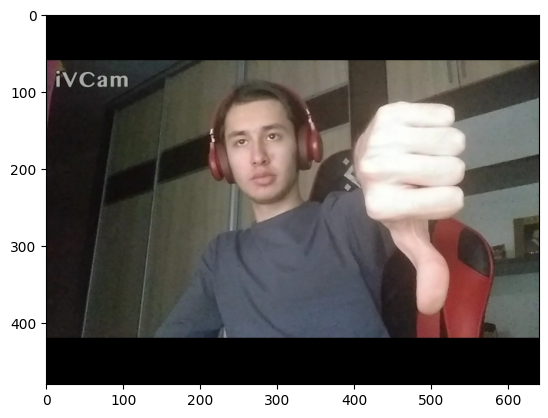

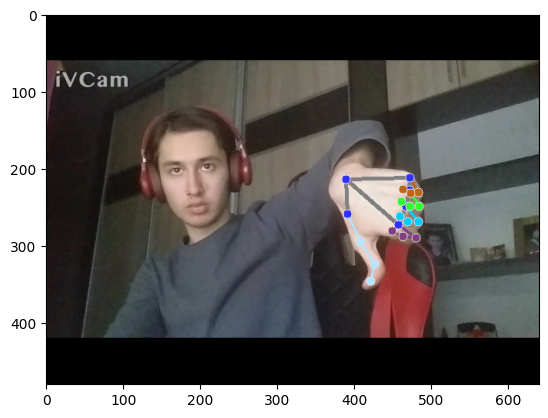

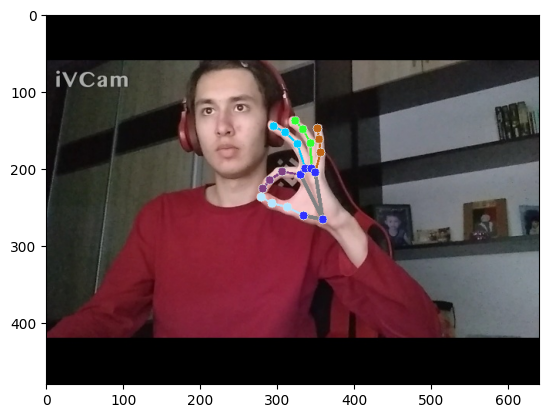

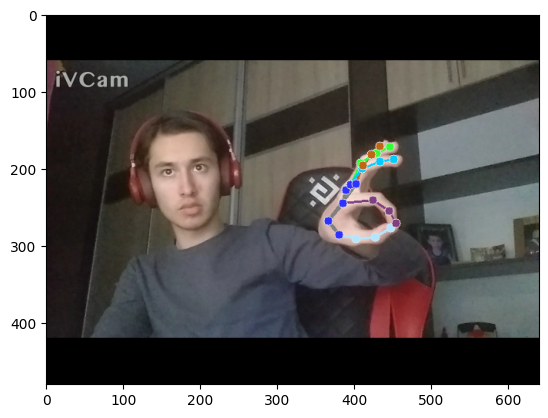

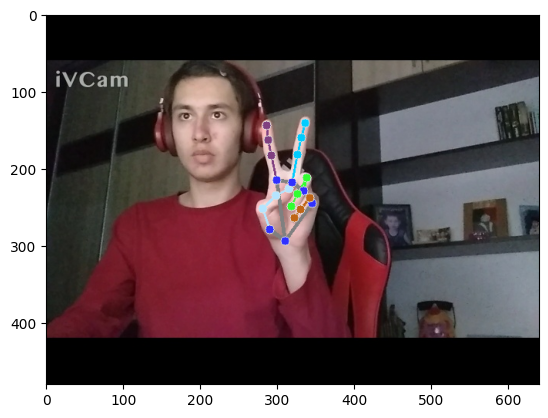

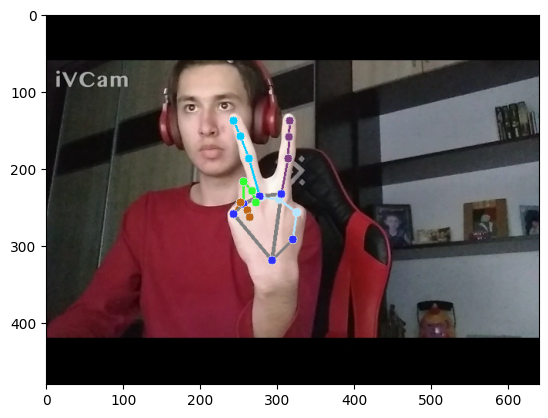

In [8]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data'

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,  # image to draw
                    hand_landmarks,  # model output
                    mp_hands.HAND_CONNECTIONS,  # hand connections
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style(),
                )

        plt.figure()
        plt.imshow(img_rgb)

plt.show()

# Creating and training the model

In [9]:
inputs = df.drop(['sign_number'], axis=1)
target = df['sign_number']

In [10]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': (100, 150, 200)
        }
    },
    'Bagging': {
        'model': BaggingClassifier(max_samples=0.8, oob_score=True),
        'params': {
            'base_estimator': (DecisionTreeClassifier(), SVC(), LogisticRegression()),
            'n_estimators': (100, 150, 200)
        }
    },
}

In [11]:
scores = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=20)

    clf.fit(inputs, target)  # training data

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,random_forest,0.995620,{'n_estimators': 150}
1,Bagging,0.991971,"{'n_estimators': 100, 'base_estimator': Decisi..."


# Training and saving the best model

The best model as you can see above is RandomForestClassifier with 150 number of trees or Bagging with DecisionTreeClassifier, which is the same thing

In [14]:
model = BaggingClassifier(max_samples=0.8, oob_score=True, n_estimators = 150, base_estimator = DecisionTreeClassifier())
model.fit(inputs, target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=150, oob_score=True)

In [15]:
with open('model.pickle', 'wb') as file:
    pickle.dump(model, file)